# Visualise the results

In [1]:
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data_folder = "/Users/martin/Library/CloudStorage/OneDrive-SharedLibraries-TheAlanTuringInstitute/Daniel Arribas-Bel - demoland_data"

In [3]:
meta_path = f"{data_folder}/spatial_units_test/meta.json"

with open(meta_path, "r") as f:
    data = json.load(f)

In [5]:
df = pd.DataFrame()
i = 0
for city in data:
    for geom in data[city]:
        for model in data[city][geom]:
            for loop in data[city][geom][model]:
                df.loc[i, ["city", "geom", "model", "loop"] + list(data[city][geom][model][loop].keys())] = [city, geom, model, loop] + list(data[city][geom][model][loop].values())
                i += 1


/var/folders/2f/fhks6w_d0k556plcv3rfmshw0000gn/T/ipykernel_45861/2928594131.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'leeds' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, ["city", "geom", "model", "loop"] + list(data[city][geom][model][loop].keys())] = [city, geom, model, loop] + list(data[city][geom][model][loop].values())
/var/folders/2f/fhks6w_d0k556plcv3rfmshw0000gn/T/ipykernel_45861/2928594131.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'h3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, ["city", "geom", "model", "loop"] + list(data[city][geom][model][loop].keys())] = [city, geom, model, loop] + list(data[city][geom][model][loop].values())
/var/folders/2f/fhks6w_d0k556plcv3rfmshw0000gn/T/ipykernel_45861/2928594131.p

In [6]:
df["moran_diff"] = df.moran_obs - df.moran_pred

## Summary

Text(0.5, 0.98, 'Air Pollution')

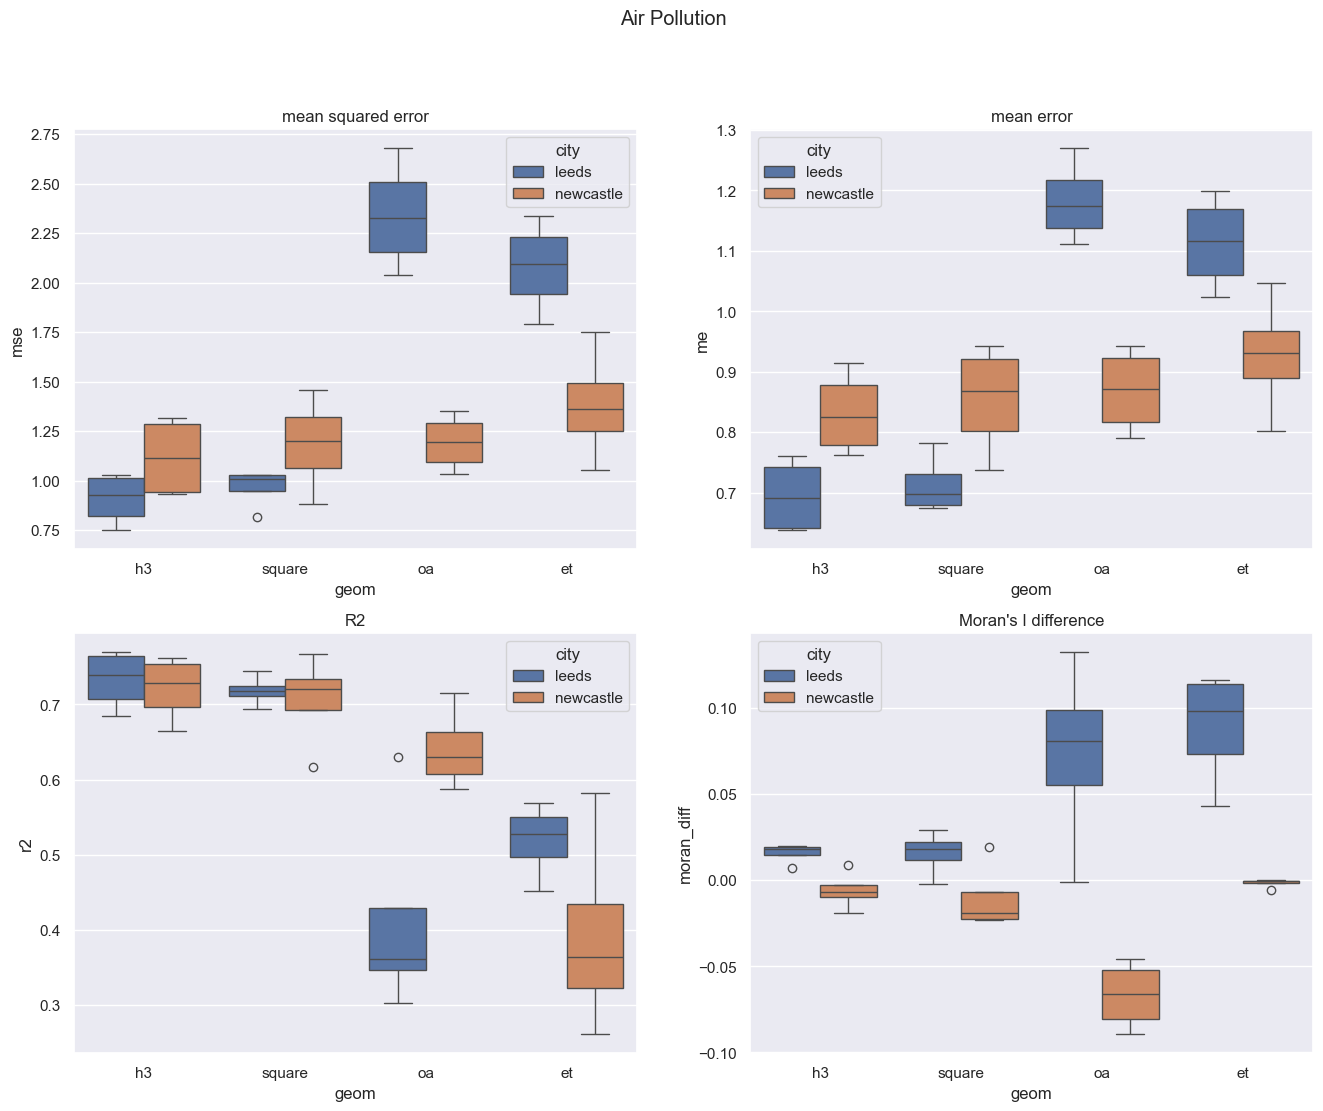

In [16]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(data=df.query("model == 'air'"), x="geom", y="mse", hue="city", ax=axs[0][0])
sns.boxplot(data=df.query("model == 'air'"), x="geom", y="me", hue="city", ax=axs[0][1])
sns.boxplot(data=df.query("model == 'air'"), x="geom", y="r2", hue="city", ax=axs[1][0])
sns.boxplot(data=df.query("model == 'air'"), x="geom", y="moran_diff", hue="city", ax=axs[1][1])
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("Air Pollution")

Text(0.5, 0.98, 'House price')

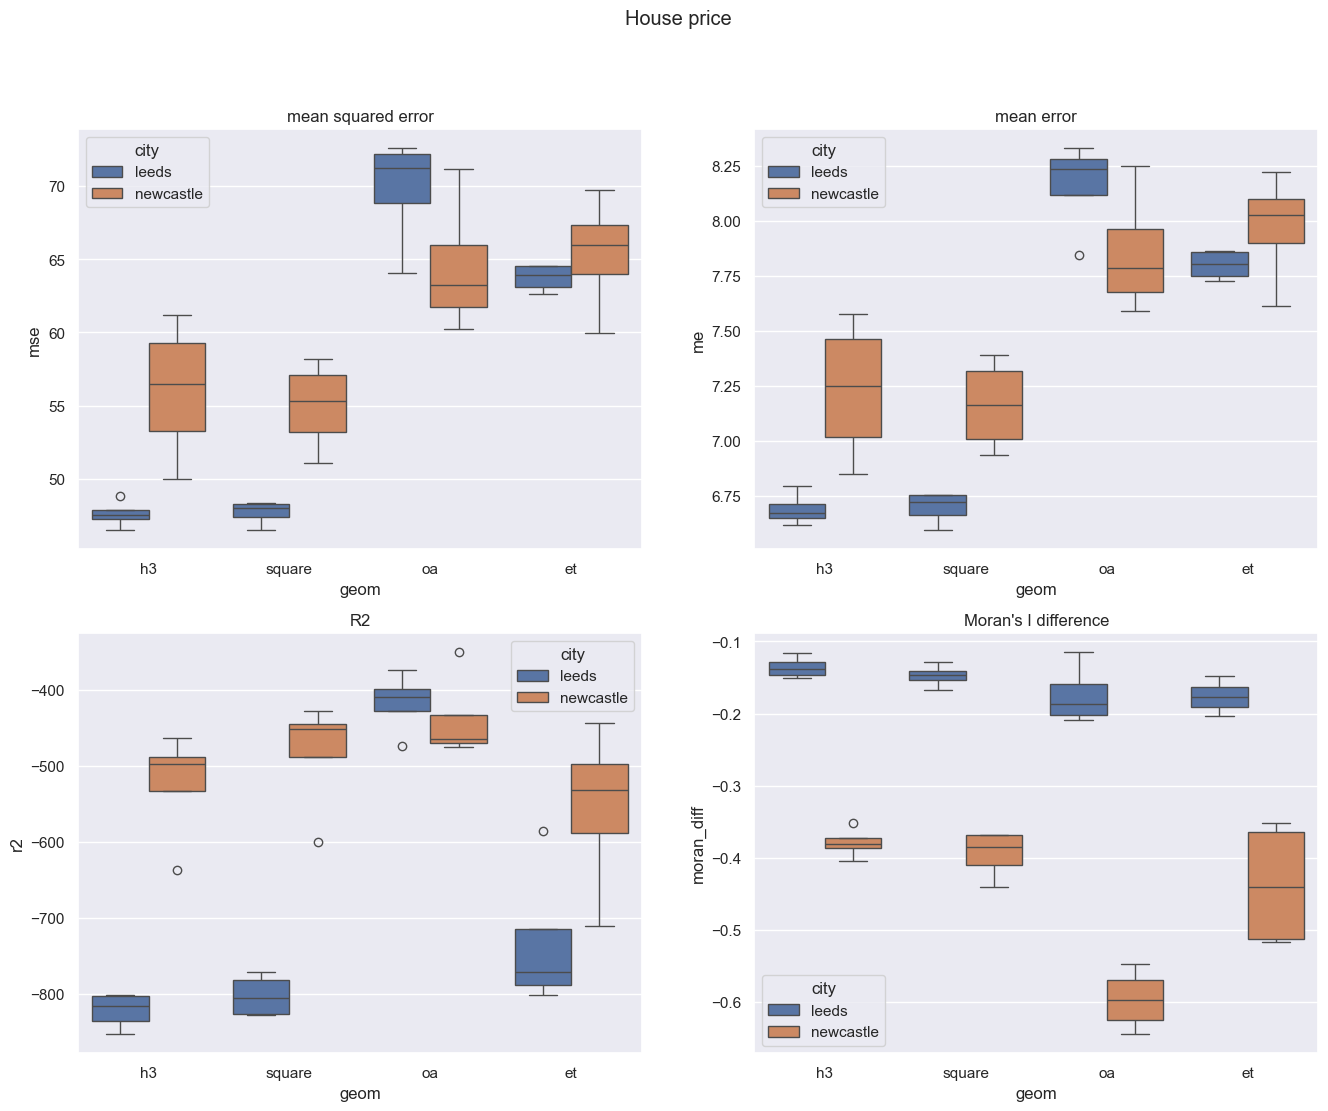

In [17]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="mse", hue="city", ax=axs[0][0])
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="me", hue="city", ax=axs[0][1])
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="r2", hue="city", ax=axs[1][0])
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="moran_diff", hue="city", ax=axs[1][1])
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("House price")

## Explore differences within splits

Text(0.5, 0.98, 'Air pollution')

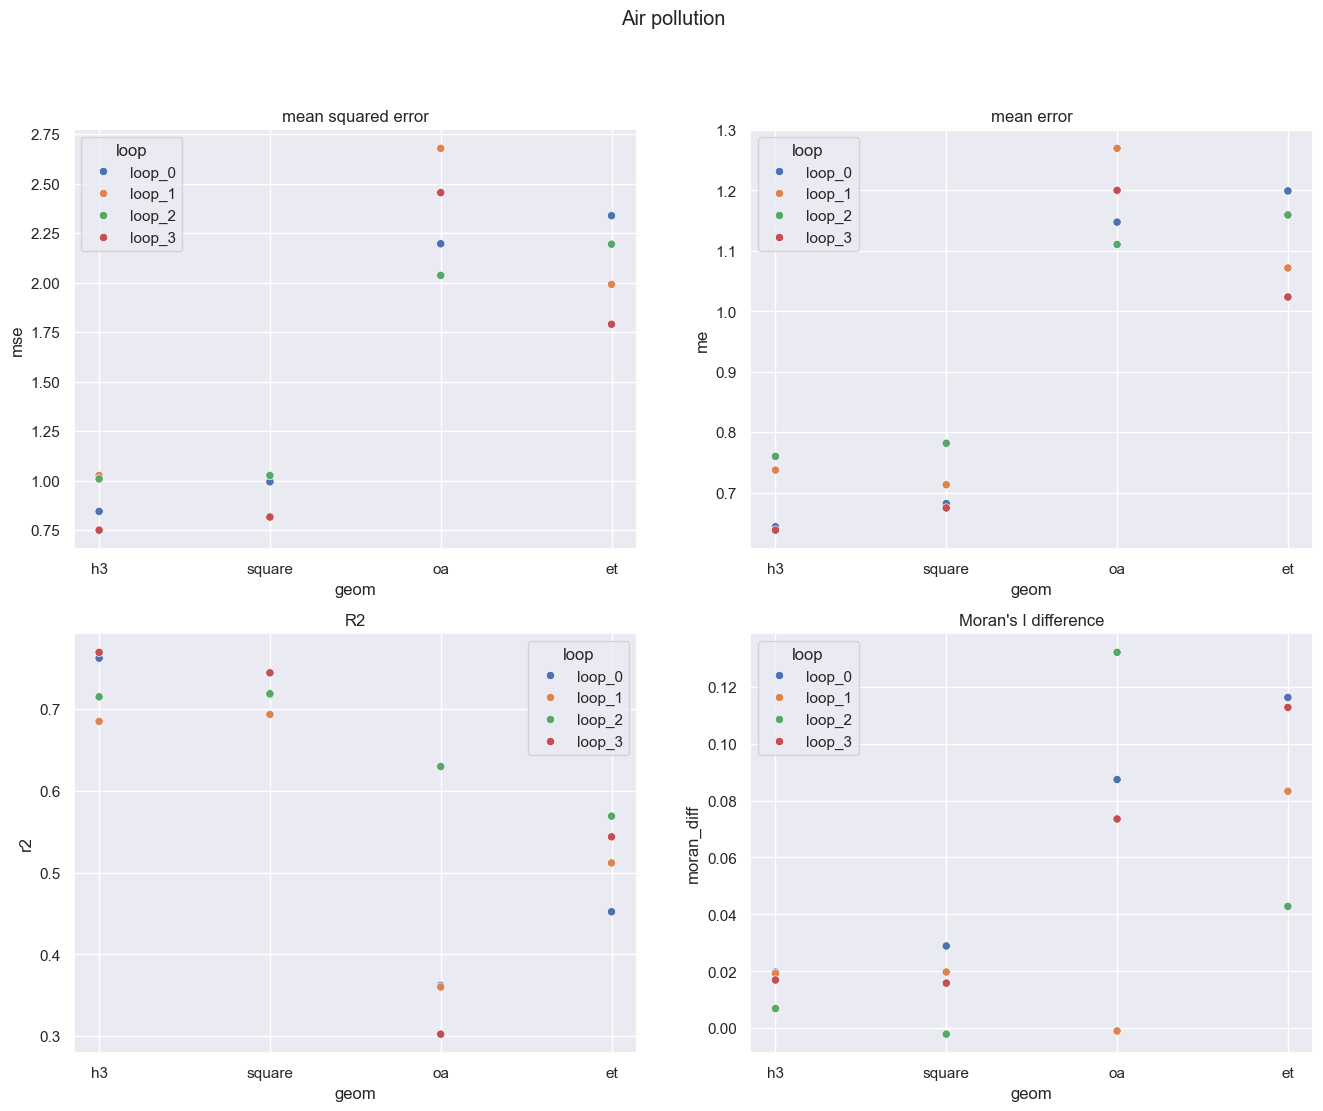

In [29]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(data=df.query("(model == 'air')").query("(city == 'leeds')"), x="geom", y="mse", hue="loop", ax=axs[0][0])
sns.scatterplot(data=df.query("(model == 'air')").query("(city == 'leeds')"), x="geom", y="me", hue="loop", ax=axs[0][1])
sns.scatterplot(data=df.query("(model == 'air')").query("(city == 'leeds')"), x="geom", y="r2", hue="loop", ax=axs[1][0])
sns.scatterplot(data=df.query("(model == 'air')").query("(city == 'leeds')"), x="geom", y="moran_diff", hue="loop", ax=axs[1][1])
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("Air pollution")

Text(0.5, 0.98, 'House price')

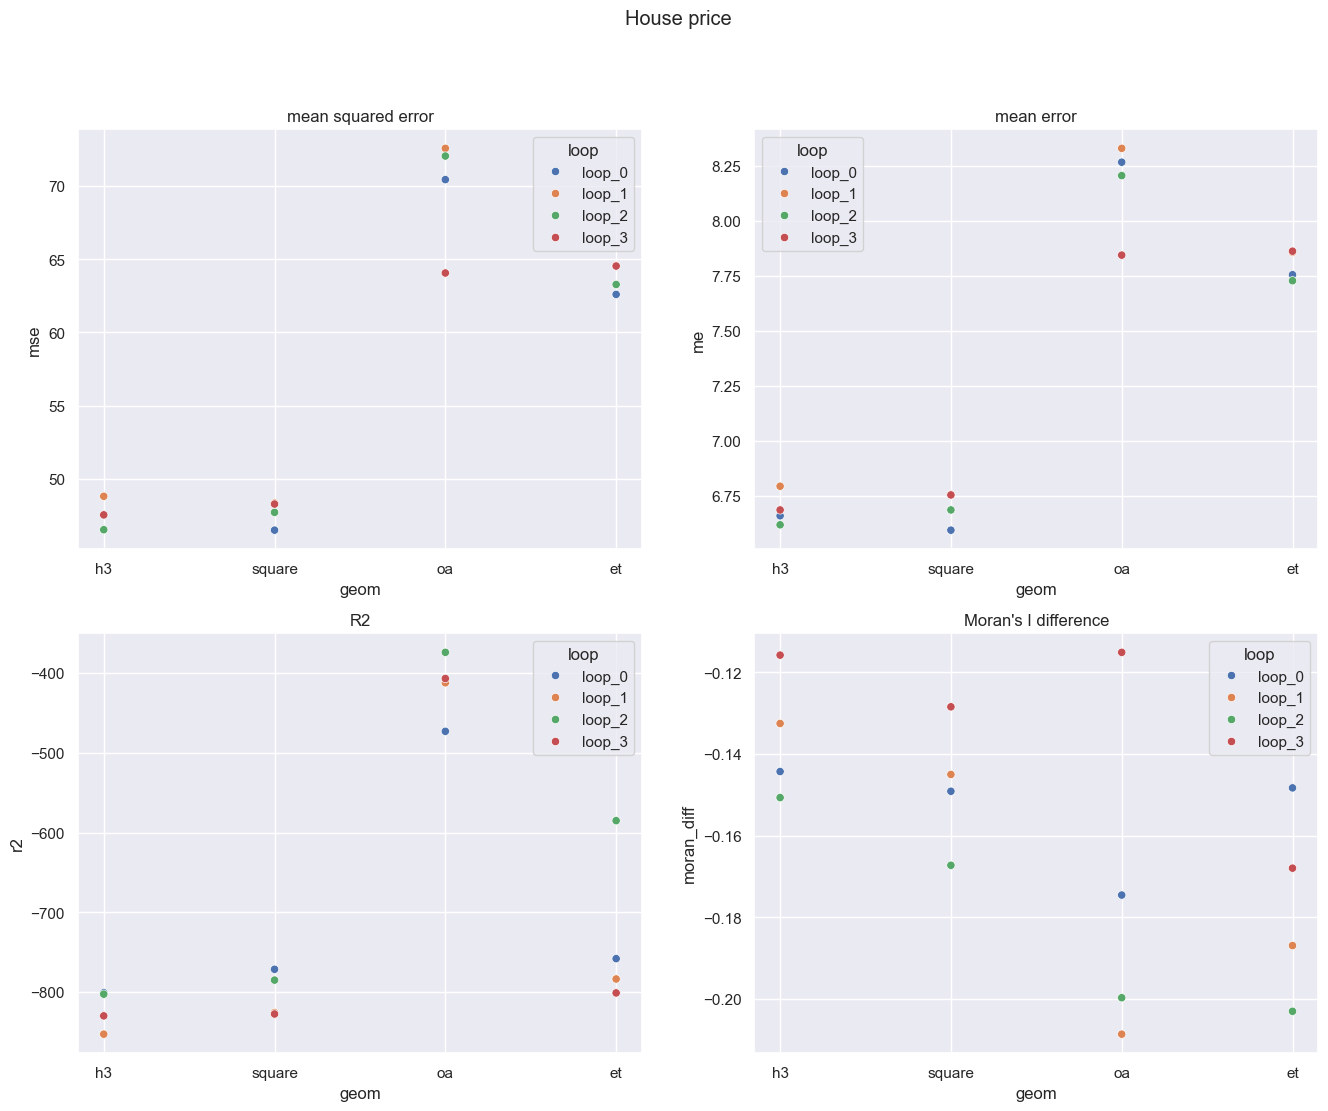

In [30]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(data=df.query("(model == 'hp')").query("(city == 'leeds')"), x="geom", y="mse", hue="loop", ax=axs[0][0])
sns.scatterplot(data=df.query("(model == 'hp')").query("(city == 'leeds')"), x="geom", y="me", hue="loop", ax=axs[0][1])
sns.scatterplot(data=df.query("(model == 'hp')").query("(city == 'leeds')"), x="geom", y="r2", hue="loop", ax=axs[1][0])
sns.scatterplot(data=df.query("(model == 'hp')").query("(city == 'leeds')"), x="geom", y="moran_diff", hue="loop", ax=axs[1][1])
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("House price")